In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Collecting the data from csv

Fields:

*   ```id``` = transaction hash with appended to the end with transaction log index;
*   ```trader``` = hash code of the trader;
*   ```base_token``` = hash code of the token, in the pool of which changes are registered;
*   ```position_size``` = size of the position ("+" - shift to long position; "-" - shift to short position);
*   ```entry_price``` - price of the token;
*   ```open_notional``` = average open notional after current transaction;
*   ```realized_pnl``` = realized profits and losses by this transaction;
*   ```funding_payment``` = received funding payment;
*   ```trading_fee``` = fee for the operation;
*   ```liquidation_fee``` = fee for the liquidation of the position;
*   ```block_number``` = number of the block where transaction was executed;
*   ```timestamp``` = time in seconds

It is required to set dictionary for finding names of pools (mostly required to analyze connection between some variables and token prices)

In [4]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

In [5]:
position_histories_df = pd.read_csv("position_histories.csv")
position_histories_df.drop(columns=["Unnamed: 0"], inplace=True)
position_histories_df["pool_name"] = position_histories_df["base_token"].replace(tokens_addresses_to_names_dict)
position_histories_df

,id,trader,base_token,position_size,open_notional,entry_price,realized_pnl,funding_payment,trading_fee,liquidation_fee,block_number,timestamp,time,pool_name
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.275492,-15000.000000,54448.103193,0.000000,0.000000,15.000000,0.0,515608,1638001140,2021-11-27 08:19:00,vBTC
1,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.165414,-9000.000000,54408.885139,0.000000,0.000000,9.000000,0.0,515587,1638001140,2021-11-27 08:19:00,vBTC
2,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.110316,-6000.000000,54389.276112,0.000000,0.000000,6.000000,0.0,515582,1638001140,2021-11-27 08:19:00,vBTC
3,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055178,-3000.000000,54369.667085,0.000000,0.000000,3.000000,0.0,515560,1638001140,2021-11-27 08:19:00,vBTC
4,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.330471,-18000.000000,54467.712220,0.000000,0.000000,18.000000,0.0,515619,1638001140,2021-11-27 08:19:00,vBTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835196,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281-0x9...,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281,0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2,145.883178,-2969.681713,20.356574,-5652.032201,105.809335,36904.128586,0.0,6653043,1651140490,2022-04-28 10:08:10,vAPE
1835197,0x947705db2127dec51b8a9980650e3126137e52d1-0xb...,0x947705db2127dec51b8a9980650e3126137e52d1,0xbe5de48197fc974600929196239e264ecb703ee8,-48341.147365,61400.966732,1.270159,39471.536056,433.894536,43812.669480,0.0,6653037,1651140490,2022-04-28 10:08:10,vMATIC
1835198,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac-0x7...,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac,0x77d0cc9568605bfff32f918c8ffaa53f72901416,-477336.488588,49466.719270,0.103631,62691.317467,1862.152554,159996.242258,0.0,6653052,1651140506,2022-04-28 10:08:26,vONE
1835199,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac-0x7...,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac,0x77d0cc9568605bfff32f918c8ffaa53f72901416,-438811.487327,45470.719260,0.103622,62691.317467,1862.152554,159992.242258,0.0,6653049,1651140506,2022-04-28 10:08:26,vONE


In [6]:
position_histories_df["time"] = pd.to_datetime(position_histories_df["timestamp"], unit='s')
position_histories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835201 entries, 0 to 1835200
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   id               object        
 1   trader           object        
 2   base_token       object        
 3   position_size    float64       
 4   open_notional    float64       
 5   entry_price      float64       
 6   realized_pnl     float64       
 7   funding_payment  float64       
 8   trading_fee      float64       
 9   liquidation_fee  float64       
 10  block_number     int64         
 11  timestamp        int64         
 12  time             datetime64[ns]
 13  pool_name        object        
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 196.0+ MB


There are many drops of values and different traders representing information of fees and funding payments. To make them analyzible it will be required to make a daily sum of those variables to see daily distributions

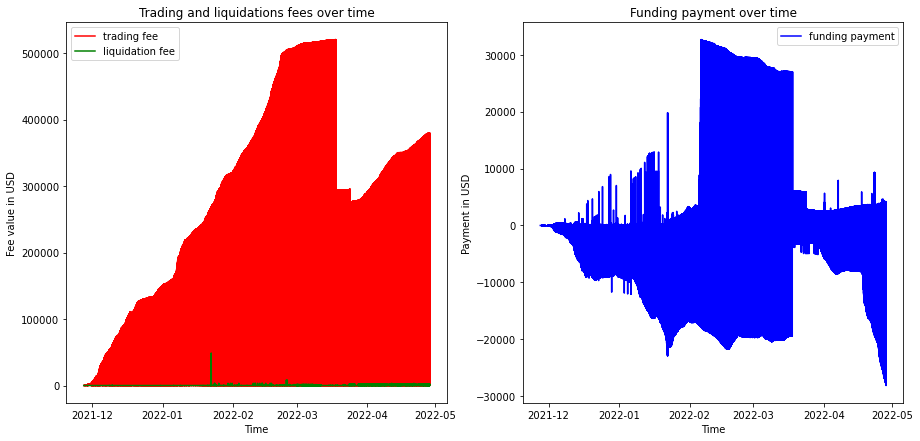

In [7]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 2, 1)
ax.plot(position_histories_df["time"], position_histories_df["trading_fee"], color='r', label='trading fee')
ax.plot(position_histories_df["time"], position_histories_df["liquidation_fee"], color='g', label='liquidation fee')
ax.set_xlabel("Time")
ax.set_ylabel("Fee value in USD")
ax.legend()
ax.set_title("Trading and liquidations fees over time")

ax = fig.add_subplot(1, 2, 2)
ax.plot(position_histories_df["time"], position_histories_df["funding_payment"], color='b', label='funding payment')
ax.set_xlabel("Time")
ax.set_ylabel("Payment in USD")
ax.legend()
ax.set_title("Funding payment over time")
plt.show()

# Some general plots of daily sums

Below can be seen grouping by day and daily sum of fees with funding payments

In [8]:
position_histories_df["day_of_year"] = position_histories_df["time"].dt.dayofyear

In [9]:
daily_position_histories_df = position_histories_df[["day_of_year", "trading_fee", "liquidation_fee", "funding_payment"]].groupby(by="day_of_year").sum()
daily_position_histories_df

,trading_fee,liquidation_fee,funding_payment
day_of_year,,,
1,1.800038e+07,0.000000,-9.724086e+05
2,1.381381e+07,48.778313,-6.308571e+05
3,2.032883e+07,2.380226,-8.410753e+05
4,2.473498e+07,94.861336,-1.021509e+06
5,4.665137e+07,595.232251,-1.854886e+06
...,...,...,...
361,5.502698e+06,0.000000,-2.266381e+05
362,2.318227e+07,0.000000,-1.416380e+06
363,3.253344e+07,282.387967,-1.689774e+06


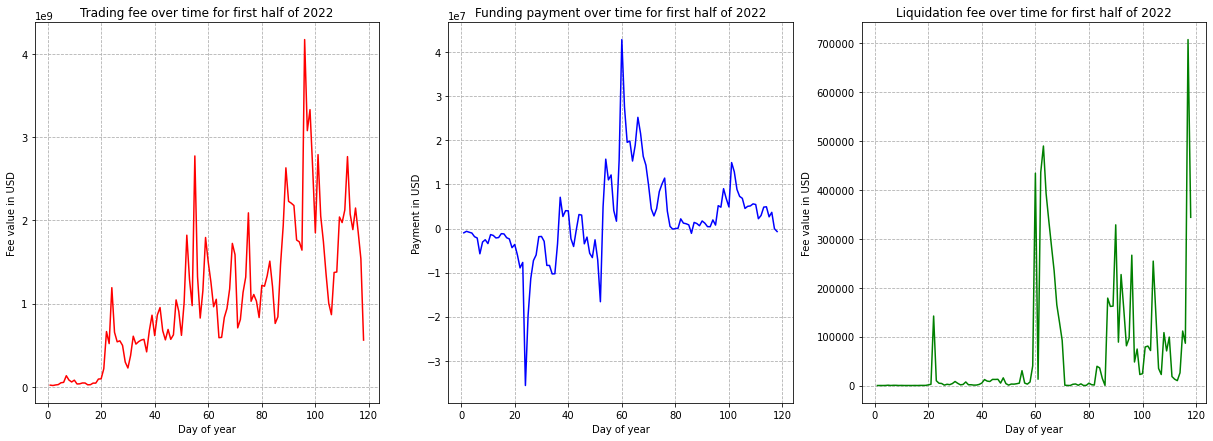

In [10]:
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(daily_position_histories_df[daily_position_histories_df.index < 200].index, 
        daily_position_histories_df[daily_position_histories_df.index < 200]["trading_fee"], color='r')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Trading fee over time for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 2)
ax.plot(daily_position_histories_df[daily_position_histories_df.index < 200].index, 
        daily_position_histories_df[daily_position_histories_df.index < 200]["funding_payment"], color='b', label='funding payment')
ax.set_xlabel("Day of year")
ax.set_ylabel("Payment in USD")
ax.set_title("Funding payment over time for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 3)
ax.plot(daily_position_histories_df[daily_position_histories_df.index < 200].index, 
        daily_position_histories_df[daily_position_histories_df.index < 200]["liquidation_fee"], color='g', label='liquidation fee')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Liquidation fee over time for first half of 2022")
ax.grid(linestyle='--')
plt.show()

In [11]:
position_histories_df

,id,trader,base_token,position_size,open_notional,entry_price,realized_pnl,funding_payment,trading_fee,liquidation_fee,block_number,timestamp,time,pool_name,day_of_year
0,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.275492,-15000.000000,54448.103193,0.000000,0.000000,15.000000,0.0,515608,1638001140,2021-11-27 08:19:00,vBTC,331
1,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.165414,-9000.000000,54408.885139,0.000000,0.000000,9.000000,0.0,515587,1638001140,2021-11-27 08:19:00,vBTC,331
2,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.110316,-6000.000000,54389.276112,0.000000,0.000000,6.000000,0.0,515582,1638001140,2021-11-27 08:19:00,vBTC,331
3,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.055178,-3000.000000,54369.667085,0.000000,0.000000,3.000000,0.0,515560,1638001140,2021-11-27 08:19:00,vBTC,331
4,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7-0x8...,0x9c1e0c67aa30c063f341885b12cb81cc94613fc7,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,0.330471,-18000.000000,54467.712220,0.000000,0.000000,18.000000,0.0,515619,1638001140,2021-11-27 08:19:00,vBTC,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835196,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281-0x9...,0x6f2ddd6d04aa4ebaa6e9529e8a1b4062a2716281,0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2,145.883178,-2969.681713,20.356574,-5652.032201,105.809335,36904.128586,0.0,6653043,1651140490,2022-04-28 10:08:10,vAPE,118
1835197,0x947705db2127dec51b8a9980650e3126137e52d1-0xb...,0x947705db2127dec51b8a9980650e3126137e52d1,0xbe5de48197fc974600929196239e264ecb703ee8,-48341.147365,61400.966732,1.270159,39471.536056,433.894536,43812.669480,0.0,6653037,1651140490,2022-04-28 10:08:10,vMATIC,118
1835198,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac-0x7...,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac,0x77d0cc9568605bfff32f918c8ffaa53f72901416,-477336.488588,49466.719270,0.103631,62691.317467,1862.152554,159996.242258,0.0,6653052,1651140506,2022-04-28 10:08:26,vONE,118
1835199,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac-0x7...,0x6879f97a6a9e2c050e38fcb90ca97aaccd189eac,0x77d0cc9568605bfff32f918c8ffaa53f72901416,-438811.487327,45470.719260,0.103622,62691.317467,1862.152554,159992.242258,0.0,6653049,1651140506,2022-04-28 10:08:26,vONE,118


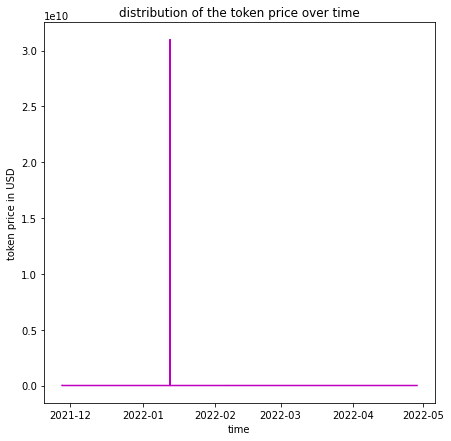

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(position_histories_df["time"], position_histories_df["entry_price"], color='m')
ax.set_xlabel("time")
ax.set_ylabel("token price in USD")
ax.set_title("distribution of the token price over time")
plt.show()

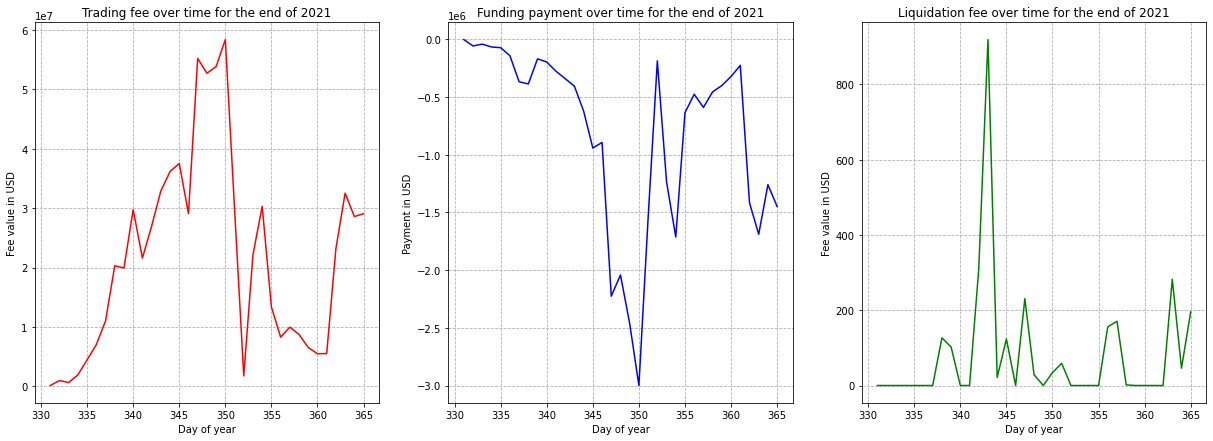

In [13]:
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(daily_position_histories_df[daily_position_histories_df.index > 300].index, 
        daily_position_histories_df[daily_position_histories_df.index > 300]["trading_fee"], color='r')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Trading fee over time for the end of 2021")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 2)
ax.plot(daily_position_histories_df[daily_position_histories_df.index > 300].index, 
        daily_position_histories_df[daily_position_histories_df.index > 300]["funding_payment"], color='b', label='funding payment')
ax.set_xlabel("Day of year")
ax.set_ylabel("Payment in USD")
ax.set_title("Funding payment over time for the end of 2021")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 3)
ax.plot(daily_position_histories_df[daily_position_histories_df.index > 300].index, 
        daily_position_histories_df[daily_position_histories_df.index > 300]["liquidation_fee"], color='g', label='liquidation fee')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Liquidation fee over time for the end of 2021")
ax.grid(linestyle='--')
plt.show()

### Realized PnL relative to fees daily sums over time

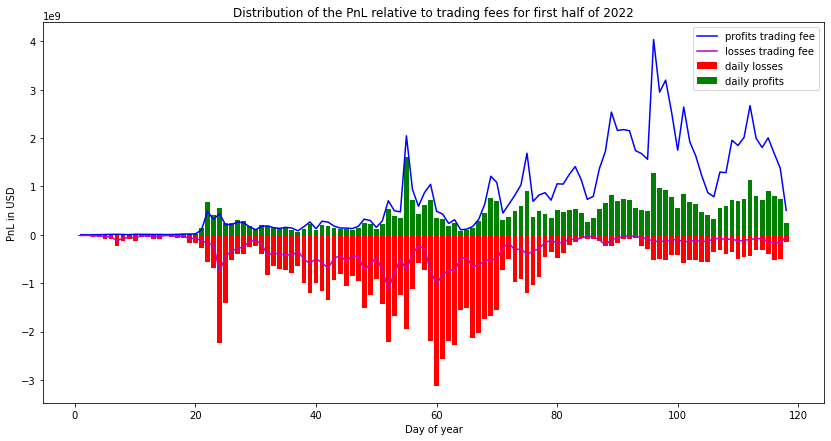

In [14]:
position_losses_df = position_histories_df[position_histories_df["realized_pnl"] < 0]
position_profits_df = position_histories_df[position_histories_df["realized_pnl"] >= 0]
daily_position_losses_df = position_losses_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()
daily_position_profits_df = position_profits_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()

fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(daily_position_losses_df[daily_position_losses_df.index < 200].index, 
       daily_position_losses_df[daily_position_losses_df.index < 200]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_position_profits_df[daily_position_profits_df.index < 200].index, 
       daily_position_profits_df[daily_position_profits_df.index < 200]["realized_pnl"], 
       color='g', label='daily profits')
ax.plot(daily_position_profits_df[daily_position_profits_df.index < 200].index, 
        daily_position_profits_df[daily_position_profits_df.index < 200]["trading_fee"], 
        color='b', label='profits trading fee')
ax.plot(daily_position_losses_df[daily_position_losses_df.index < 200].index, 
        -daily_position_losses_df[daily_position_losses_df.index < 200]["trading_fee"], 
        color='m', label='losses trading fee')

ax.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL in USD")
ax.set_title("Distribution of the PnL relative to trading fees for first half of 2022")
plt.show()

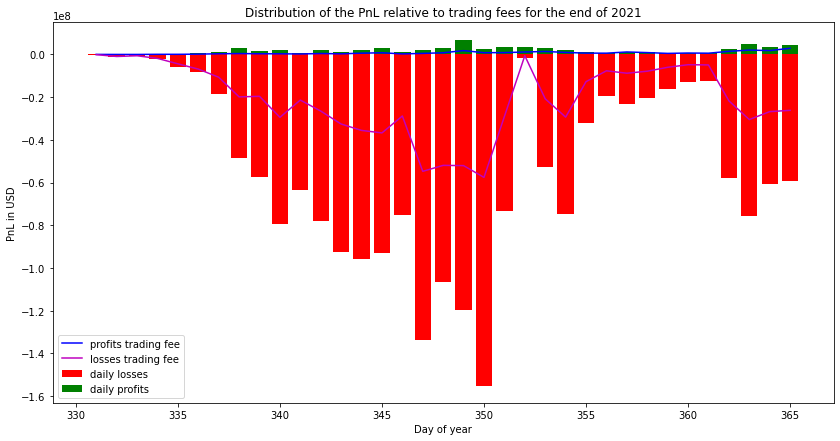

In [15]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(daily_position_losses_df[daily_position_losses_df.index > 300].index, 
       daily_position_losses_df[daily_position_losses_df.index > 300]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_position_profits_df[daily_position_profits_df.index > 300].index, 
       daily_position_profits_df[daily_position_profits_df.index > 300]["realized_pnl"], 
       color='g', label='daily profits')
ax.plot(daily_position_profits_df[daily_position_profits_df.index > 300].index, 
        daily_position_profits_df[daily_position_profits_df.index > 300]["trading_fee"], 
        color='b', label='profits trading fee')
ax.plot(daily_position_losses_df[daily_position_losses_df.index > 300].index, 
        -daily_position_losses_df[daily_position_losses_df.index > 300]["trading_fee"], 
        color='m', label='losses trading fee')

ax.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL in USD")
ax.set_title("Distribution of the PnL relative to trading fees for the end of 2021")
plt.show()

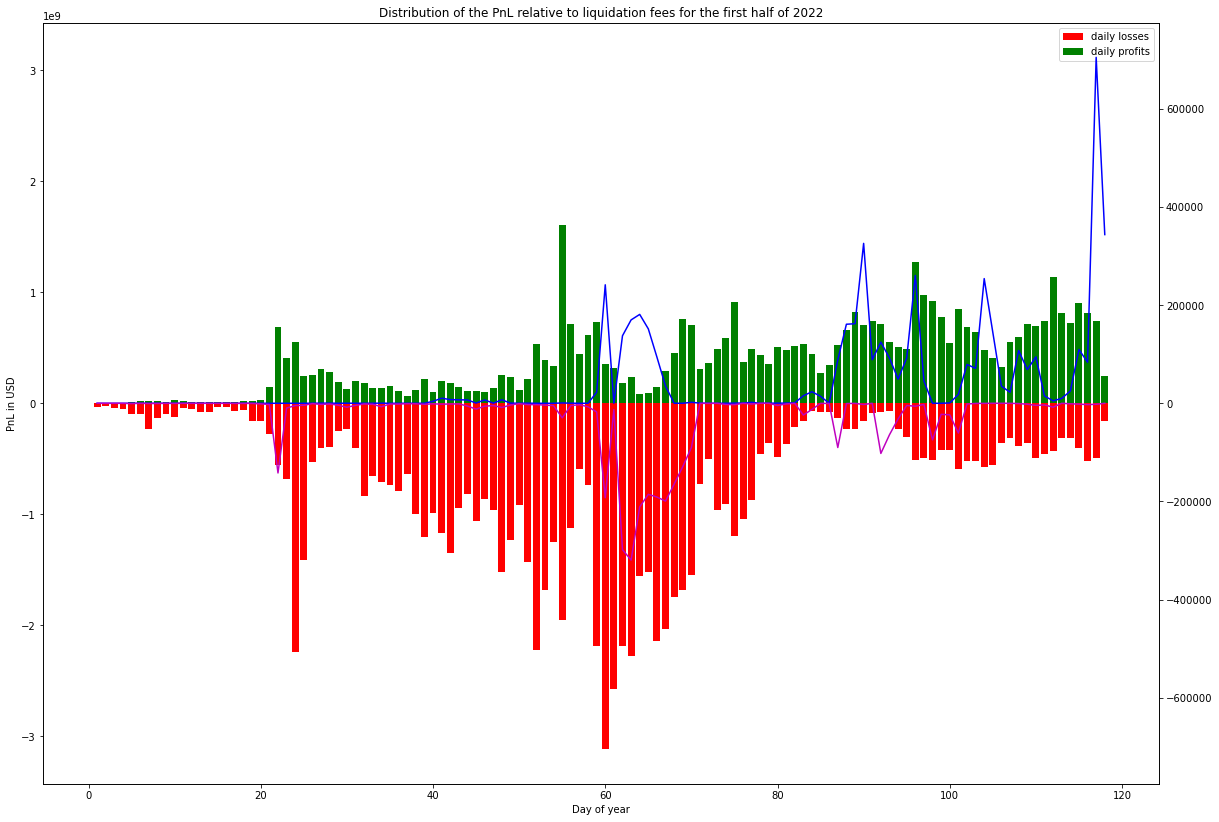

In [16]:
fig, ax = plt.subplots(figsize=(20, 14))
ax2 = ax.twinx()
ax.bar(daily_position_losses_df[daily_position_losses_df.index < 200].index, 
       daily_position_losses_df[daily_position_losses_df.index < 200]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_position_profits_df[daily_position_profits_df.index < 200].index, 
       daily_position_profits_df[daily_position_profits_df.index < 200]["realized_pnl"], 
       color='g', label='daily profits')
ax2.plot(daily_position_profits_df[daily_position_profits_df.index < 200].index, 
        daily_position_profits_df[daily_position_profits_df.index < 200]["liquidation_fee"], 
        color='b', label='profits liquidation fee')
ax2.plot(daily_position_losses_df[daily_position_losses_df.index < 200].index, 
        -daily_position_losses_df[daily_position_losses_df.index < 200]["liquidation_fee"], 
        color='m', label='losses liquidation fee')

#       finding biggest absolute value of pnl and fee
max_loss = daily_position_losses_df["realized_pnl"].min()
max_profit = daily_position_profits_df["realized_pnl"].max()
max_pnl = abs(max_loss) if abs(max_loss) > max_profit else max_profit
max_loss_fee = daily_position_losses_df["liquidation_fee"].max()
max_profit_fee = daily_position_profits_df["liquidation_fee"].max()
max_pnl_fee = max_loss_fee if max_loss_fee > max_profit_fee else max_profit_fee

ax.set_xlabel("Day of year")
ax.set_ylabel("PnL in USD")
ax.set_ylim(-max_pnl * 1.1, max_pnl * 1.1)
ax2.set_ylim(-max_pnl_fee * 1.1, max_pnl_fee * 1.1)
ax.legend()
ax.set_title("Distribution of the PnL relative to liquidation fees for the first half of 2022")
plt.show()

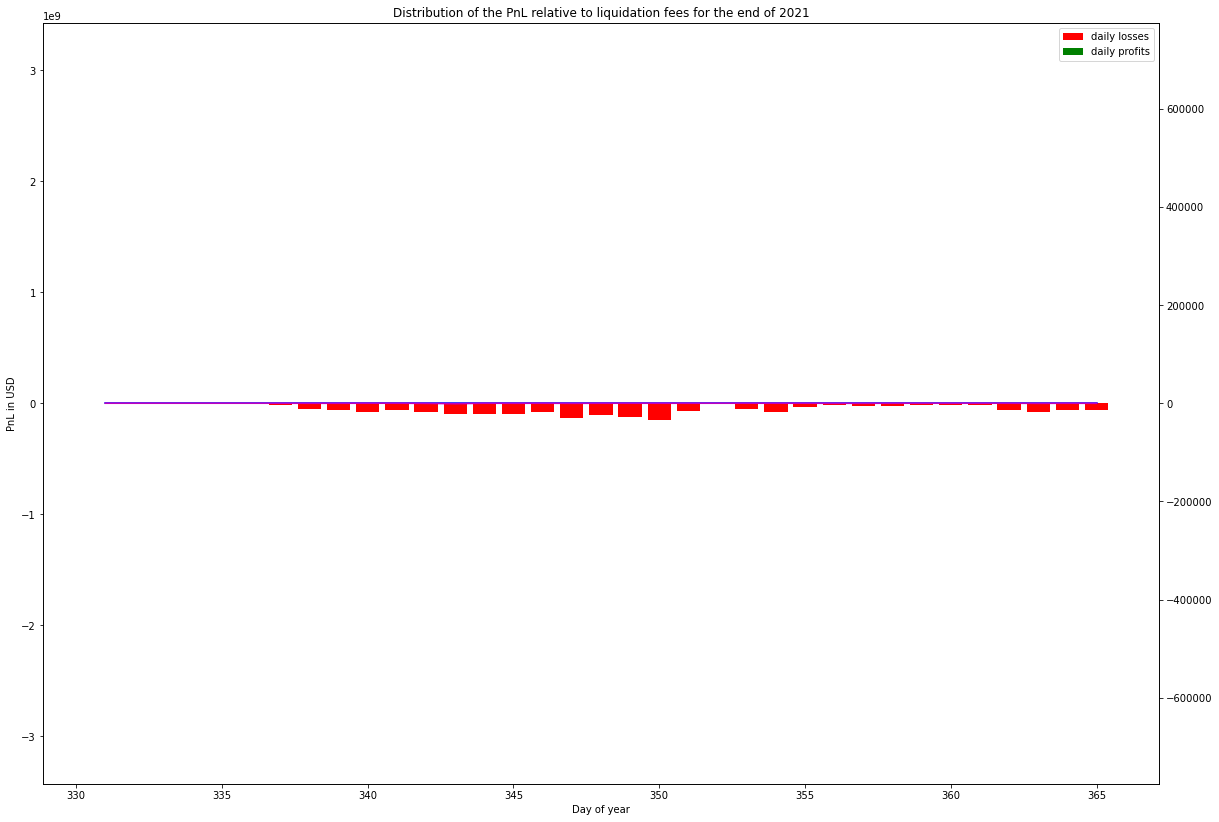

In [17]:
fig, ax = plt.subplots(figsize=(20, 14))
ax2 = ax.twinx()
ax.bar(daily_position_losses_df[daily_position_losses_df.index > 300].index, 
       daily_position_losses_df[daily_position_losses_df.index > 300]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_position_profits_df[daily_position_profits_df.index > 300].index, 
       daily_position_profits_df[daily_position_profits_df.index > 300]["realized_pnl"], 
       color='g', label='daily profits')
ax2.plot(daily_position_profits_df[daily_position_profits_df.index > 300].index, 
        daily_position_profits_df[daily_position_profits_df.index > 300]["liquidation_fee"], 
        color='b', label='profits liquidation fee')
ax2.plot(daily_position_losses_df[daily_position_losses_df.index > 300].index, 
        -daily_position_losses_df[daily_position_losses_df.index > 300]["liquidation_fee"], 
        color='m', label='losses liquidation fee')

#       finding biggest absolute value of pnl and fee
max_loss = daily_position_losses_df["realized_pnl"].min()
max_profit = daily_position_profits_df["realized_pnl"].max()
max_pnl = abs(max_loss) if abs(max_loss) > max_profit else max_profit
max_loss_fee = daily_position_losses_df["liquidation_fee"].max()
max_profit_fee = daily_position_profits_df["liquidation_fee"].max()
max_pnl_fee = max_loss_fee if max_loss_fee > max_profit_fee else max_profit_fee

ax.set_xlabel("Day of year")
ax.set_ylabel("PnL in USD")
ax.set_ylim(-max_pnl * 1.1, max_pnl * 1.1)
ax2.set_ylim(-max_pnl_fee * 1.1, max_pnl_fee * 1.1)
ax.legend()
ax.set_title("Distribution of the PnL relative to liquidation fees for the end of 2021")
plt.show()

In [18]:
grouped_by_pool_positions_df = position_histories_df[["pool_name", "realized_pnl", "funding_payment", "trading_fee",
                                                      "liquidation_fee"]].groupby("pool_name").sum()
grouped_by_pool_positions_df

,realized_pnl,funding_payment,trading_fee,liquidation_fee
pool_name,,,,
vAAVE,-6.258104e+07,3.228288e+05,3.599440e+08,0.000000e+00
vAPE,-4.809956e+07,3.955268e+05,2.695868e+08,1.096167e+02
vATOM,-1.396556e+09,8.614280e+07,4.397694e+09,6.140863e+06
vAVAX,-6.509838e+09,1.934242e+08,1.741480e+10,3.590326e+04
vBNB,-6.647412e+07,2.394662e+06,1.052235e+08,0.000000e+00
vBTC,-8.903544e+09,-6.170760e+07,7.578734e+09,2.124412e+04
vCRV,-1.476836e+09,3.999673e+08,1.071151e+10,0.000000e+00
vETH,-7.402038e+09,-6.832817e+08,1.993426e+10,4.244844e+05
vFLOW,1.034647e+08,1.846362e+05,1.172718e+09,5.562512e+02


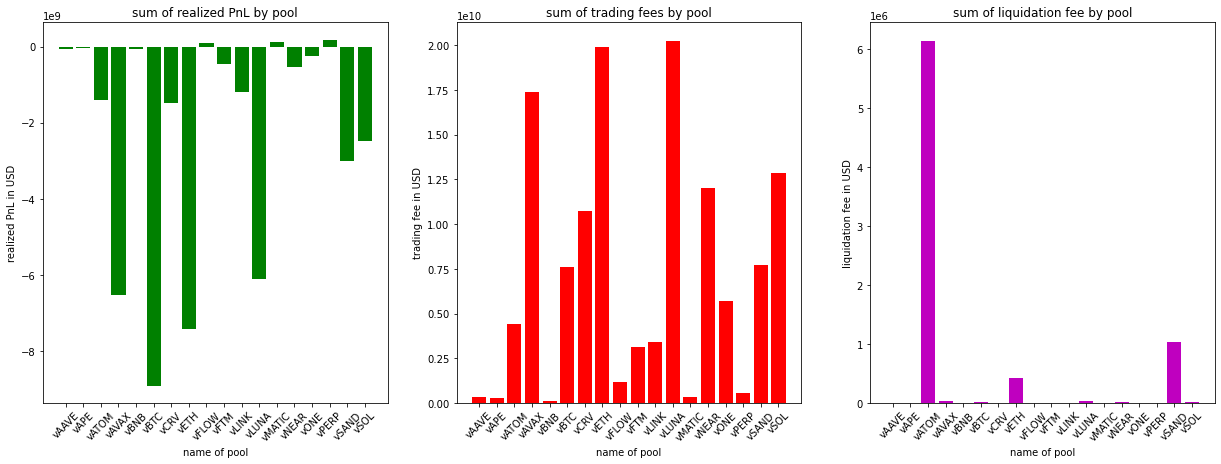

In [19]:
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
ax.bar(grouped_by_pool_positions_df.index, grouped_by_pool_positions_df["realized_pnl"], color='g')
ax.set_xlabel("name of pool")
ax.set_ylabel("realized PnL in USD")
ax.set_title("sum of realized PnL by pool")
plt.xticks(rotation=45)

ax = fig.add_subplot(1, 3, 2)
ax.bar(grouped_by_pool_positions_df.index, grouped_by_pool_positions_df["trading_fee"], color='r')
ax.set_xlabel("name of pool")
ax.set_ylabel("trading fee in USD")
ax.set_title("sum of trading fees by pool")
plt.xticks(rotation=45)

ax = fig.add_subplot(1, 3, 3)
ax.bar(grouped_by_pool_positions_df.index, grouped_by_pool_positions_df["liquidation_fee"], color='m')
ax.set_xlabel("name of pool")
ax.set_ylabel("liquidation fee in USD")
ax.set_title("sum of liquidation fee by pool")
plt.xticks(rotation=45)

plt.show()

Above are demonstrated total sums per each pool for ```realized PnL, trading fees, liquidation fees```. Here are some interesting observations:

*   While in most of the cases for Perpetual V1 there were much more profits than losses and there was only several pools with non-profitable results for traders, here can be seen that most of the pools have extreme losses. Only 6 pools (*vAAVE*, *vAPE*, *vBNB*, *vFLOW*, *vMATIC*, *vPERP*) show very small profits. From the losses perspective leading pools are *vBTC*, *vETH*, *vAVAX*, *vLUNA*. Considering this moment it is required to review 4 pools more closely to check how pools behave: *vBTC*, *vETH*, *vPERP*, *vMATIC*;
*   From the perspective of trading fees can be observed correlation with realized PnL. Profitable pools demonstrate small trading fees while pools with big losses have extreme trading fees. It is required to check if those fees are caused by higher activity or bigger activity capitalization;
*    From the perspective of liquidation fees there are leading *vATOM*, *vETH* and *vSAND*. It is also required to check reason of this distribution

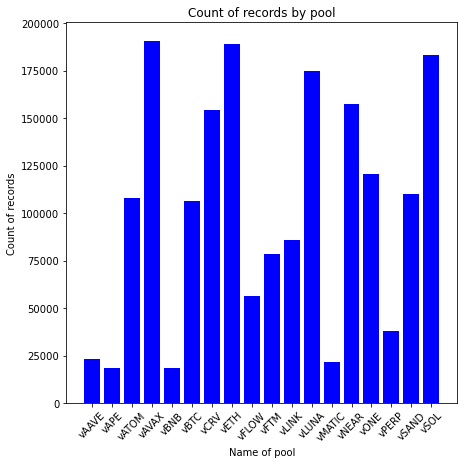

In [20]:
count_positions_df = position_histories_df[["pool_name", "realized_pnl"]].groupby("pool_name").count()

fig, ax = plt.subplots(figsize=(7, 7))
ax.bar(count_positions_df.index, count_positions_df["realized_pnl"], color='b')
ax.set_xlabel("Name of pool")
ax.set_ylabel("Count of records")
ax.set_title("Count of records by pool")
plt.xticks(rotation=45)
plt.show()

# Finding names of tokens in history and tokenwise analysis

## Setting pool names based on the addresses

In [21]:
position_histories_df[["time", "base_token", "pool_name"]]

,time,base_token,pool_name
0,2021-11-27 08:19:00,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,vBTC
1,2021-11-27 08:19:00,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,vBTC
2,2021-11-27 08:19:00,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,vBTC
3,2021-11-27 08:19:00,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,vBTC
4,2021-11-27 08:19:00,0x86f1e0420c26a858fc203a3645dd1a36868f18e5,vBTC
...,...,...,...
1835196,2022-04-28 10:08:10,0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2,vAPE
1835197,2022-04-28 10:08:10,0xbe5de48197fc974600929196239e264ecb703ee8,vMATIC
1835198,2022-04-28 10:08:26,0x77d0cc9568605bfff32f918c8ffaa53f72901416,vONE
1835199,2022-04-28 10:08:26,0x77d0cc9568605bfff32f918c8ffaa53f72901416,vONE


In all of the reviewed cases can be seen strange rises/drops of the token prices in such a manner, than it goes out of the expected price distribution deviation and most likely there are some suspicious activity. This assumption is supported by the fact that in the official documentation of Perpetual V2 there is mentioned possibility of performing MEV sandwich attacks because platform is constructed on top of the Uniswap V3.

Interesting observation is that profitable pools have small position history, while pools with extreme losses have activity history for more than a month. Considering this moment it is required to review traders participating in the pools.

## BTC data analysis

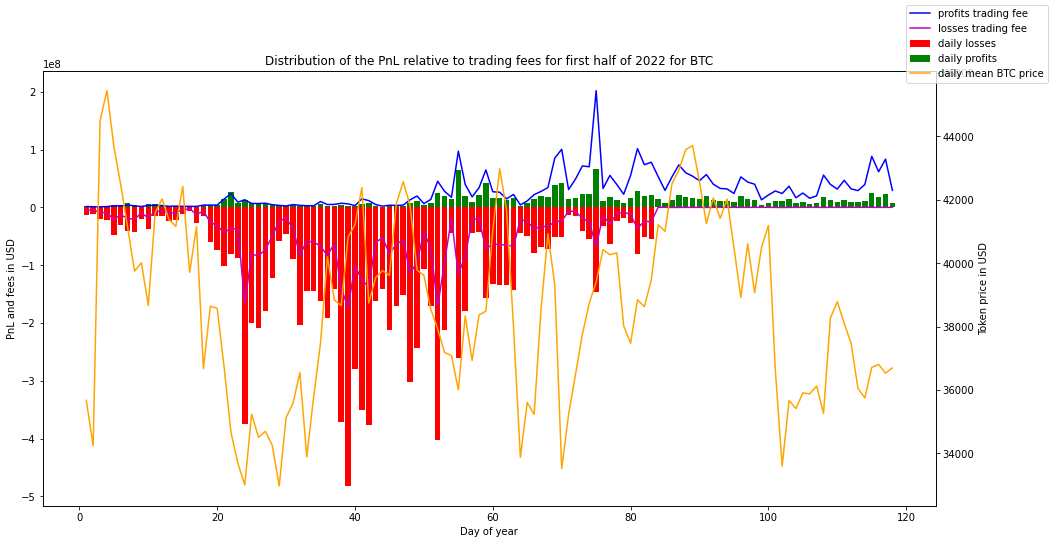

In [22]:
btc_position_histories_df = position_histories_df[position_histories_df["pool_name"] == "vBTC"]

btc_position_losses_df = btc_position_histories_df[btc_position_histories_df["realized_pnl"] < 0]
btc_position_profits_df = btc_position_histories_df[btc_position_histories_df["realized_pnl"] >= 0]
daily_btc_position_losses_df = btc_position_losses_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()
daily_btc_position_profits_df = btc_position_profits_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()

daily_btc_price_df = btc_position_histories_df[["day_of_year", "entry_price"]].groupby("day_of_year").mean()

fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax.bar(daily_btc_position_losses_df[daily_btc_position_losses_df.index < 200].index, 
       daily_btc_position_losses_df[daily_btc_position_losses_df.index < 200]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_btc_position_profits_df[daily_btc_position_profits_df.index < 200].index, 
       daily_btc_position_profits_df[daily_btc_position_profits_df.index < 200]["realized_pnl"], 
       color='g', label='daily profits')
ax.plot(daily_btc_position_profits_df[daily_btc_position_profits_df.index < 200].index, 
        daily_btc_position_profits_df[daily_btc_position_profits_df.index < 200]["trading_fee"], 
        color='b', label='profits trading fee')
ax.plot(daily_btc_position_losses_df[daily_btc_position_losses_df.index < 200].index, 
        -daily_btc_position_losses_df[daily_btc_position_losses_df.index < 200]["trading_fee"], 
        color='m', label='losses trading fee')
ax2.plot(daily_btc_price_df[daily_btc_price_df.index < 200].index, 
        daily_btc_price_df[daily_btc_price_df.index < 200]["entry_price"], 
        color='orange', label='daily mean BTC price')

fig.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL and fees in USD")
ax2.set_ylabel("Token price in USD")
ax.set_title("Distribution of the PnL relative to trading fees for first half of 2022 for BTC")
plt.show()

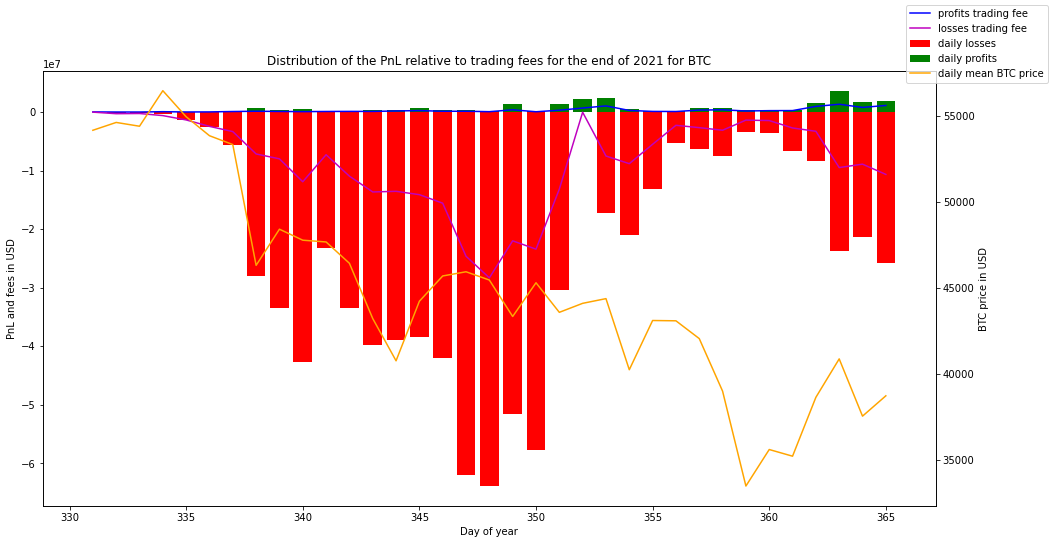

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax.bar(daily_btc_position_losses_df[daily_btc_position_losses_df.index > 300].index, 
       daily_btc_position_losses_df[daily_btc_position_losses_df.index > 300]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_btc_position_profits_df[daily_btc_position_profits_df.index > 300].index, 
       daily_btc_position_profits_df[daily_btc_position_profits_df.index > 300]["realized_pnl"], 
       color='g', label='daily profits')
ax.plot(daily_btc_position_profits_df[daily_btc_position_profits_df.index > 300].index, 
        daily_btc_position_profits_df[daily_btc_position_profits_df.index > 300]["trading_fee"], 
        color='b', label='profits trading fee')
ax.plot(daily_btc_position_losses_df[daily_btc_position_losses_df.index > 300].index, 
        -daily_btc_position_losses_df[daily_btc_position_losses_df.index > 300]["trading_fee"], 
        color='m', label='losses trading fee')
ax2.plot(daily_btc_price_df[daily_btc_price_df.index > 300].index, 
         daily_btc_price_df[daily_btc_price_df.index > 300]["entry_price"],
         color='orange', label="daily mean BTC price")

fig.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL and fees in USD")
ax2.set_ylabel("BTC price in USD")
ax.set_title("Distribution of the PnL relative to trading fees for the end of 2021 for BTC")
plt.show()

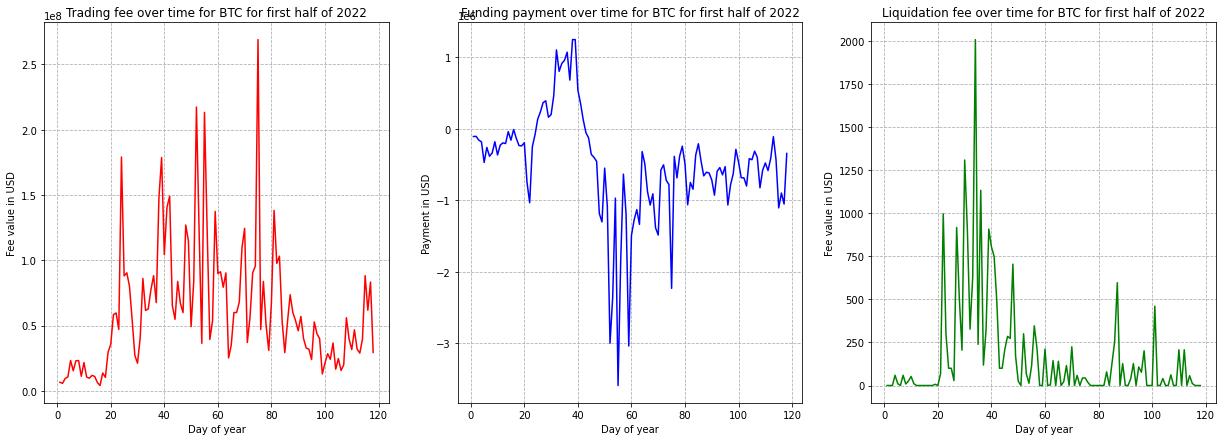

In [24]:
daily_btc_positions_df = position_histories_df[position_histories_df["pool_name"] == "vBTC"][[
    "day_of_year", "trading_fee", "liquidation_fee", "funding_payment"]].groupby(by='day_of_year').sum()

fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(daily_btc_positions_df[daily_btc_positions_df.index < 200].index, 
        daily_btc_positions_df[daily_btc_positions_df.index < 200]["trading_fee"], color='r')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Trading fee over time for BTC for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 2)
ax.plot(daily_btc_positions_df[daily_btc_positions_df.index < 200].index, 
        daily_btc_positions_df[daily_btc_positions_df.index < 200]["funding_payment"], color='b', label='funding payment')
ax.set_xlabel("Day of year")
ax.set_ylabel("Payment in USD")
ax.set_title("Funding payment over time for BTC for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 3)
ax.plot(daily_btc_positions_df[daily_btc_positions_df.index < 200].index, 
        daily_btc_positions_df[daily_btc_positions_df.index < 200]["liquidation_fee"], color='g', label='liquidation fee')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Liquidation fee over time for BTC for first half of 2022")
ax.grid(linestyle='--')
plt.show()

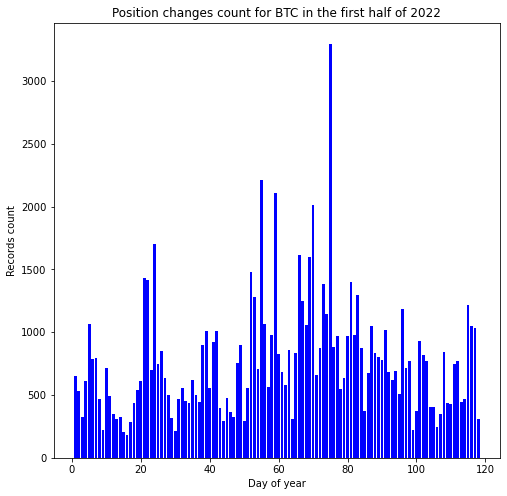

In [25]:
daily_count_position_histories_btc_df = position_histories_df[position_histories_df["pool_name"] == "vBTC"
                                                             ][["day_of_year", "trading_fee"]].groupby("day_of_year"
                                                                                                      ).count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(daily_count_position_histories_btc_df[daily_count_position_histories_btc_df.index < 200].index,
      daily_count_position_histories_btc_df[daily_count_position_histories_btc_df.index < 200]["trading_fee"],
      color='b')
ax.set_xlabel("Day of year")
ax.set_ylabel("Records count")
ax.set_title("Position changes count for BTC in the first half of 2022")
plt.show()

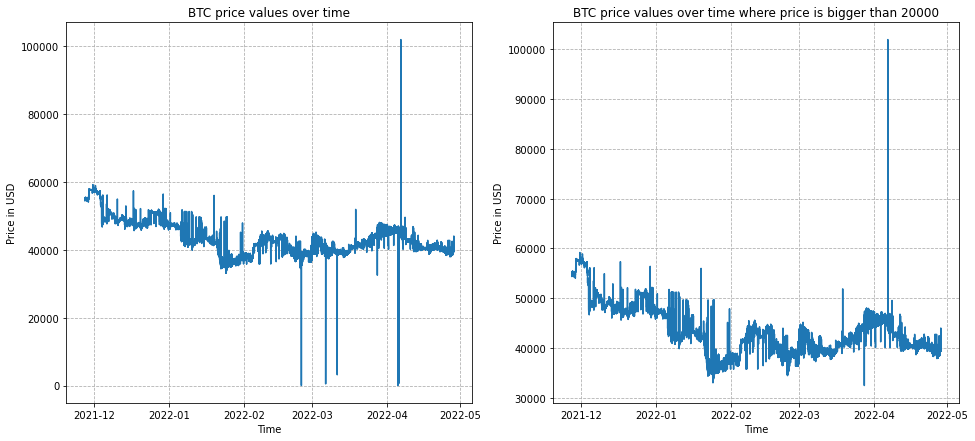

In [26]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 2, 1)
ax.plot(position_histories_df[(position_histories_df["pool_name"] == "vBTC") &
                              (position_histories_df["entry_price"] > 0)]["time"],
        position_histories_df[(position_histories_df["pool_name"] == "vBTC") &
                              (position_histories_df["entry_price"] > 0)]["entry_price"])
ax.set_xlabel("Time")
ax.set_ylabel("Price in USD")
ax.set_title("BTC price values over time")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 2, 2)
ax.plot(position_histories_df[(position_histories_df["pool_name"] == "vBTC") &
                              (position_histories_df["entry_price"] > 20000)]["time"],
        position_histories_df[(position_histories_df["pool_name"] == "vBTC") &
                              (position_histories_df["entry_price"] > 20000)]["entry_price"])
ax.set_xlabel("Time")
ax.set_ylabel("Price in USD")
ax.set_title("BTC price values over time where price is bigger than 20000")
ax.grid(linestyle='--')
plt.show()

## ETH data analysis

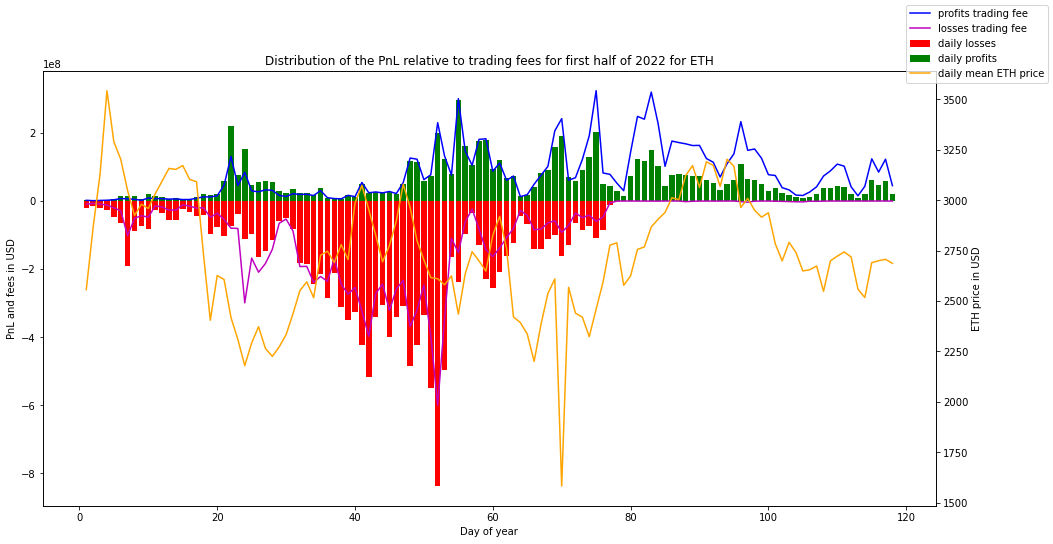

In [27]:
eth_position_histories_df = position_histories_df[position_histories_df["pool_name"] == "vETH"]

eth_position_losses_df = eth_position_histories_df[eth_position_histories_df["realized_pnl"] < 0]
eth_position_profits_df = eth_position_histories_df[eth_position_histories_df["realized_pnl"] >= 0]
daily_eth_position_losses_df = eth_position_losses_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()
daily_eth_position_profits_df = eth_position_profits_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()

daily_eth_price_df = eth_position_histories_df[["day_of_year", "entry_price"]].groupby("day_of_year").mean()

fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax.bar(daily_eth_position_losses_df[daily_eth_position_losses_df.index < 200].index, 
       daily_eth_position_losses_df[daily_eth_position_losses_df.index < 200]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_eth_position_profits_df[daily_eth_position_profits_df.index < 200].index, 
       daily_eth_position_profits_df[daily_eth_position_profits_df.index < 200]["realized_pnl"], 
       color='g', label='daily profits')
ax.plot(daily_eth_position_profits_df[daily_eth_position_profits_df.index < 200].index, 
        daily_eth_position_profits_df[daily_eth_position_profits_df.index < 200]["trading_fee"], 
        color='b', label='profits trading fee')
ax.plot(daily_eth_position_losses_df[daily_eth_position_losses_df.index < 200].index, 
        -daily_eth_position_losses_df[daily_eth_position_losses_df.index < 200]["trading_fee"], 
        color='m', label='losses trading fee')
ax2.plot(daily_eth_price_df[(daily_eth_price_df.index < 200) & 
                            (daily_eth_price_df["entry_price"] < 10000)].index,
         daily_eth_price_df[(daily_eth_price_df.index < 200) & 
                            (daily_eth_price_df["entry_price"] < 10000)]["entry_price"],
         color='orange', label='daily mean ETH price')

fig.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL and fees in USD")
ax2.set_ylabel("ETH price in USD")
ax.set_title("Distribution of the PnL relative to trading fees for first half of 2022 for ETH")
plt.show()

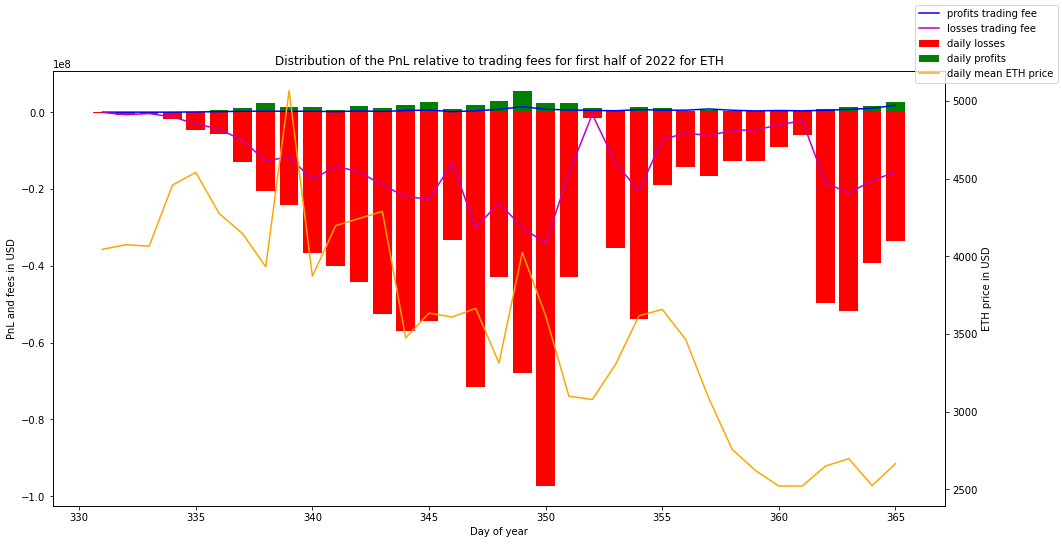

In [28]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax.bar(daily_eth_position_losses_df[daily_eth_position_losses_df.index > 300].index, 
       daily_eth_position_losses_df[daily_eth_position_losses_df.index > 300]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_eth_position_profits_df[daily_eth_position_profits_df.index > 300].index, 
       daily_eth_position_profits_df[daily_eth_position_profits_df.index > 300]["realized_pnl"], 
       color='g', label='daily profits')
ax.plot(daily_eth_position_profits_df[daily_eth_position_profits_df.index > 300].index, 
        daily_eth_position_profits_df[daily_eth_position_profits_df.index > 300]["trading_fee"], 
        color='b', label='profits trading fee')
ax.plot(daily_eth_position_losses_df[daily_eth_position_losses_df.index > 300].index, 
        -daily_eth_position_losses_df[daily_eth_position_losses_df.index > 300]["trading_fee"], 
        color='m', label='losses trading fee')
ax2.plot(daily_eth_price_df[(daily_eth_price_df.index > 300) & 
                            (daily_eth_price_df["entry_price"] < 10000)].index,
         daily_eth_price_df[(daily_eth_price_df.index > 300) & 
                            (daily_eth_price_df["entry_price"] < 10000)]["entry_price"],
         color='orange', label='daily mean ETH price')


fig.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL and fees in USD")
ax2.set_ylabel("ETH price in USD")
ax.set_title("Distribution of the PnL relative to trading fees for first half of 2022 for ETH")
plt.show()

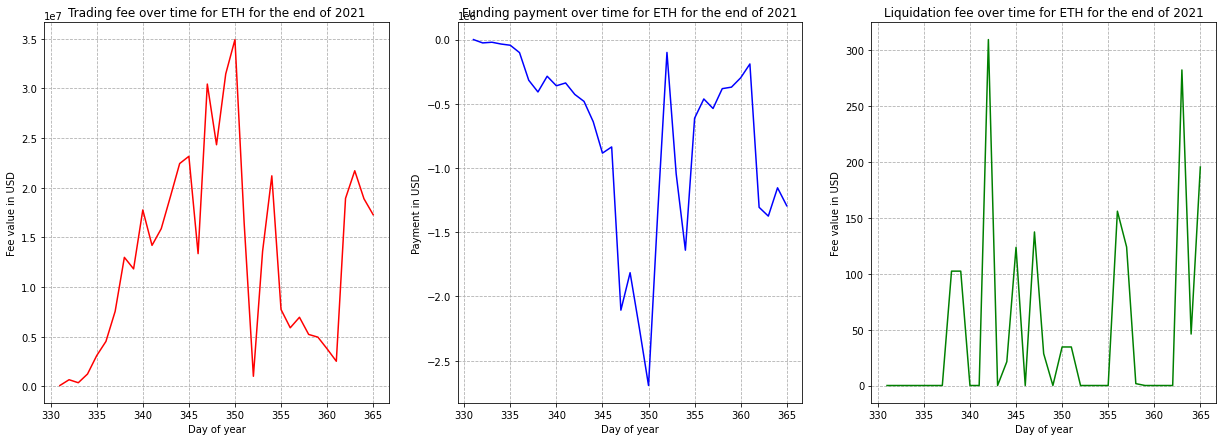

In [29]:
daily_eth_positions_df = position_histories_df[position_histories_df["pool_name"] == "vETH"][[
    "day_of_year", "trading_fee", "liquidation_fee", "funding_payment"]].groupby(by='day_of_year').sum()

fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(daily_eth_positions_df[daily_eth_positions_df.index > 300].index, 
        daily_eth_positions_df[daily_eth_positions_df.index > 300]["trading_fee"], color='r')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Trading fee over time for ETH for the end of 2021")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 2)
ax.plot(daily_eth_positions_df[daily_eth_positions_df.index > 300].index, 
        daily_eth_positions_df[daily_eth_positions_df.index > 300]["funding_payment"], color='b', label='funding payment')
ax.set_xlabel("Day of year")
ax.set_ylabel("Payment in USD")
ax.set_title("Funding payment over time for ETH for the end of 2021")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 3)
ax.plot(daily_eth_positions_df[daily_eth_positions_df.index > 300].index, 
        daily_eth_positions_df[daily_eth_positions_df.index > 300]["liquidation_fee"], color='g', label='liquidation fee')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Liquidation fee over time for ETH for the end of 2021")
ax.grid(linestyle='--')
plt.show()

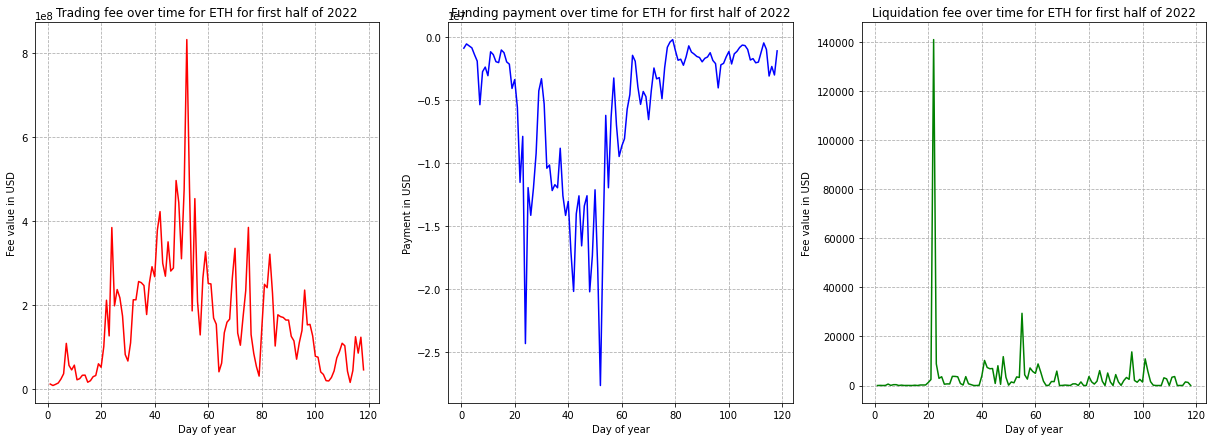

In [30]:
daily_eth_positions_df = position_histories_df[position_histories_df["pool_name"] == "vETH"][[
    "day_of_year", "trading_fee", "liquidation_fee", "funding_payment"]].groupby(by='day_of_year').sum()

fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(daily_eth_positions_df[daily_eth_positions_df.index < 200].index, 
        daily_eth_positions_df[daily_eth_positions_df.index < 200]["trading_fee"], color='r')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Trading fee over time for ETH for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 2)
ax.plot(daily_eth_positions_df[daily_eth_positions_df.index < 200].index, 
        daily_eth_positions_df[daily_eth_positions_df.index < 200]["funding_payment"], color='b', label='funding payment')
ax.set_xlabel("Day of year")
ax.set_ylabel("Payment in USD")
ax.set_title("Funding payment over time for ETH for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 3)
ax.plot(daily_eth_positions_df[daily_eth_positions_df.index < 200].index, 
        daily_eth_positions_df[daily_eth_positions_df.index < 200]["liquidation_fee"], color='g', label='liquidation fee')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Liquidation fee over time for ETH for first half of 2022")
ax.grid(linestyle='--')
plt.show()

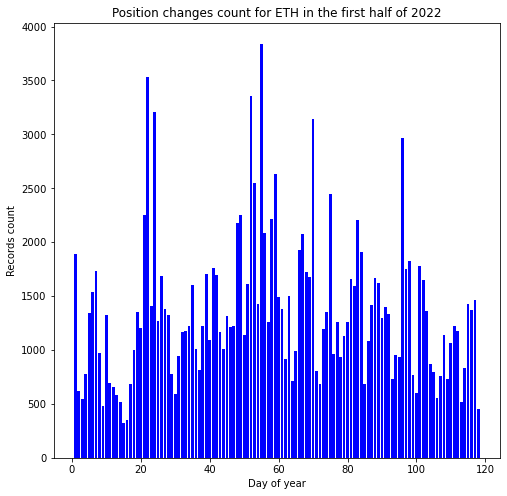

In [31]:
daily_count_position_histories_eth_df = position_histories_df[position_histories_df["pool_name"] == "vETH"
                                                             ][["day_of_year", "trading_fee"]].groupby("day_of_year"
                                                                                                      ).count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(daily_count_position_histories_eth_df[daily_count_position_histories_eth_df.index < 200].index,
      daily_count_position_histories_eth_df[daily_count_position_histories_eth_df.index < 200]["trading_fee"],
      color='b')
ax.set_xlabel("Day of year")
ax.set_ylabel("Records count")
ax.set_title("Position changes count for ETH in the first half of 2022")
plt.show()

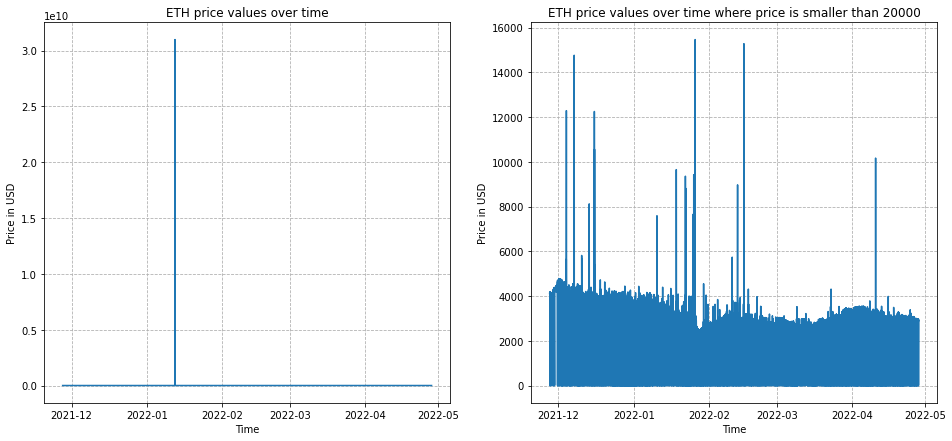

In [32]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 2, 1)
ax.plot(position_histories_df[(position_histories_df["pool_name"] == "vETH") &
                              (position_histories_df["entry_price"] > 0)]["time"],
        position_histories_df[(position_histories_df["pool_name"] == "vETH") &
                              (position_histories_df["entry_price"] > 0)]["entry_price"])
ax.set_xlabel("Time")
ax.set_ylabel("Price in USD")
ax.set_title("ETH price values over time")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 2, 2)
ax.plot(position_histories_df[(position_histories_df["pool_name"] == "vETH") &
                              (position_histories_df["entry_price"] < 20000)]["time"],
        position_histories_df[(position_histories_df["pool_name"] == "vETH") &
                              (position_histories_df["entry_price"] < 20000)]["entry_price"])
ax.set_xlabel("Time")
ax.set_ylabel("Price in USD")
ax.set_title("ETH price values over time where price is smaller than 20000")
ax.grid(linestyle='--')
plt.show()

## PERP data analysis

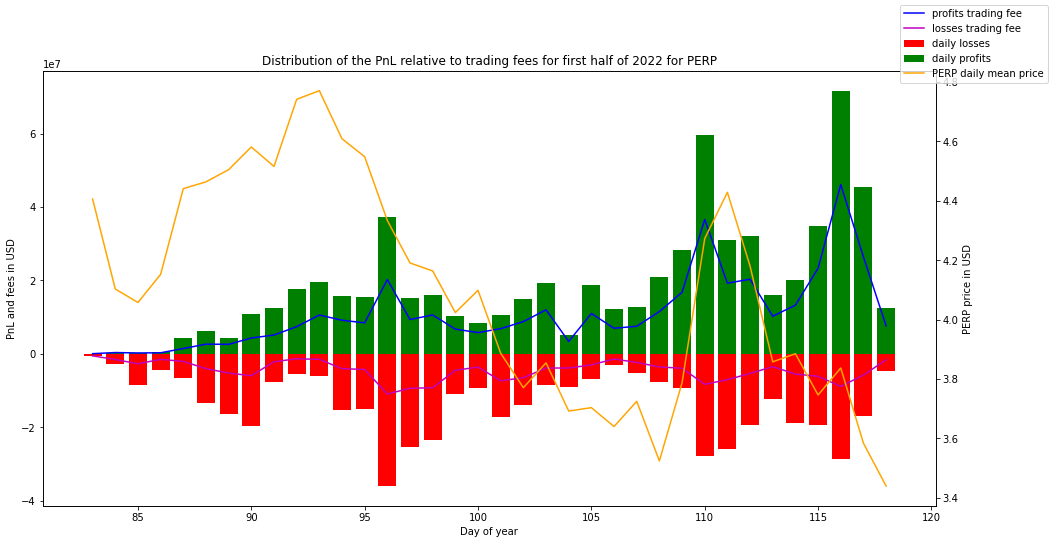

In [33]:
perp_position_histories_df = position_histories_df[position_histories_df["pool_name"] == "vPERP"]

perp_position_losses_df = perp_position_histories_df[perp_position_histories_df["realized_pnl"] < 0]
perp_position_profits_df = perp_position_histories_df[perp_position_histories_df["realized_pnl"] >= 0]
daily_perp_position_losses_df = perp_position_losses_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()
daily_perp_position_profits_df = perp_position_profits_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()

daily_perp_price_df = perp_position_histories_df[["day_of_year", "entry_price"]].groupby("day_of_year").mean()

fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax.bar(daily_perp_position_losses_df[daily_perp_position_losses_df.index < 200].index, 
       daily_perp_position_losses_df[daily_perp_position_losses_df.index < 200]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_perp_position_profits_df[daily_perp_position_profits_df.index < 200].index, 
       daily_perp_position_profits_df[daily_perp_position_profits_df.index < 200]["realized_pnl"], 
       color='g', label='daily profits')
ax.plot(daily_perp_position_profits_df[daily_perp_position_profits_df.index < 200].index, 
        daily_perp_position_profits_df[daily_perp_position_profits_df.index < 200]["trading_fee"], 
        color='b', label='profits trading fee')
ax.plot(daily_perp_position_losses_df[daily_perp_position_losses_df.index < 200].index, 
        -daily_perp_position_losses_df[daily_perp_position_losses_df.index < 200]["trading_fee"], 
        color='m', label='losses trading fee')
ax2.plot(daily_perp_price_df[daily_perp_price_df.index < 200].index,
         daily_perp_price_df[daily_perp_price_df.index < 200]["entry_price"],
         color='orange', label='PERP daily mean price')

fig.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL and fees in USD")
ax2.set_ylabel("PERP price in USD")
ax.set_title("Distribution of the PnL relative to trading fees for first half of 2022 for PERP")
plt.show()

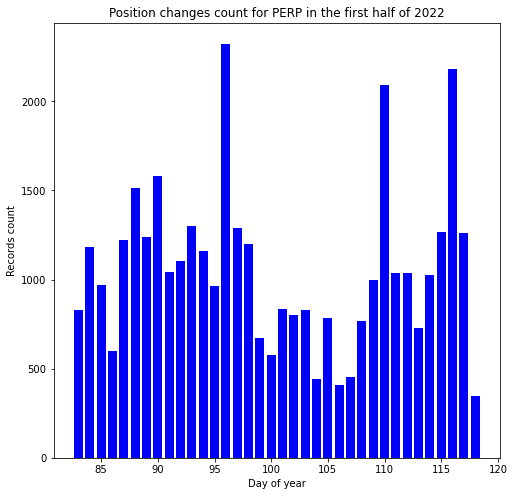

In [34]:
daily_count_position_histories_perp_df = position_histories_df[position_histories_df["pool_name"] == "vPERP"
                                                             ][["day_of_year", "trading_fee"]].groupby("day_of_year"
                                                                                                      ).count()

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(daily_count_position_histories_perp_df[daily_count_position_histories_perp_df.index < 200].index,
      daily_count_position_histories_perp_df[daily_count_position_histories_perp_df.index < 200]["trading_fee"],
      color='b')
ax.set_xlabel("Day of year")
ax.set_ylabel("Records count")
ax.set_title("Position changes count for PERP in the first half of 2022")
plt.show()

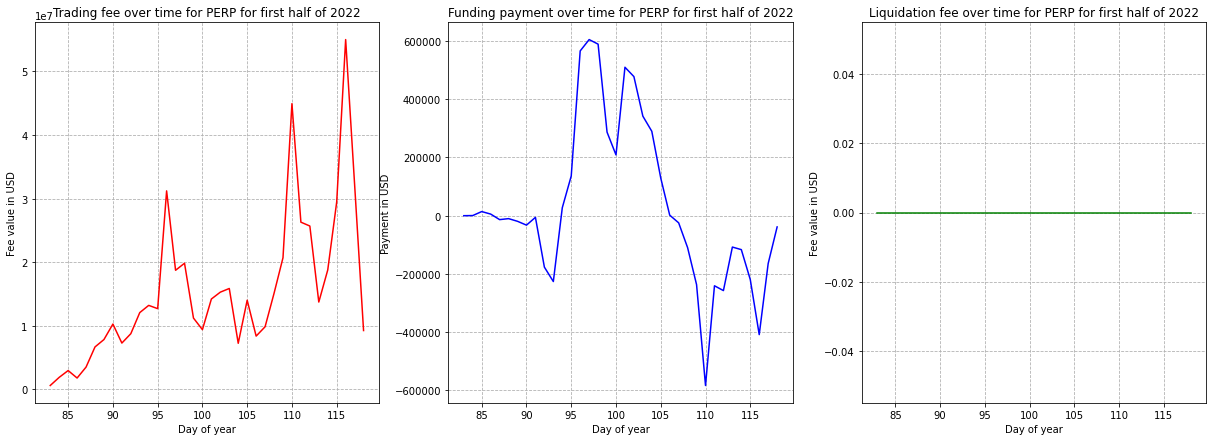

In [35]:
daily_perp_positions_df = position_histories_df[position_histories_df["pool_name"] == "vPERP"][[
    "day_of_year", "trading_fee", "liquidation_fee", "funding_payment"]].groupby(by='day_of_year').sum()

fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(daily_perp_positions_df[daily_perp_positions_df.index < 200].index, 
        daily_perp_positions_df[daily_perp_positions_df.index < 200]["trading_fee"], color='r')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Trading fee over time for PERP for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 2)
ax.plot(daily_perp_positions_df[daily_perp_positions_df.index < 200].index, 
        daily_perp_positions_df[daily_perp_positions_df.index < 200]["funding_payment"], color='b', label='funding payment')
ax.set_xlabel("Day of year")
ax.set_ylabel("Payment in USD")
ax.set_title("Funding payment over time for PERP for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 3)
ax.plot(daily_perp_positions_df[daily_perp_positions_df.index < 200].index, 
        daily_perp_positions_df[daily_perp_positions_df.index < 200]["liquidation_fee"], color='g', label='liquidation fee')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Liquidation fee over time for PERP for first half of 2022")
ax.grid(linestyle='--')
plt.show()

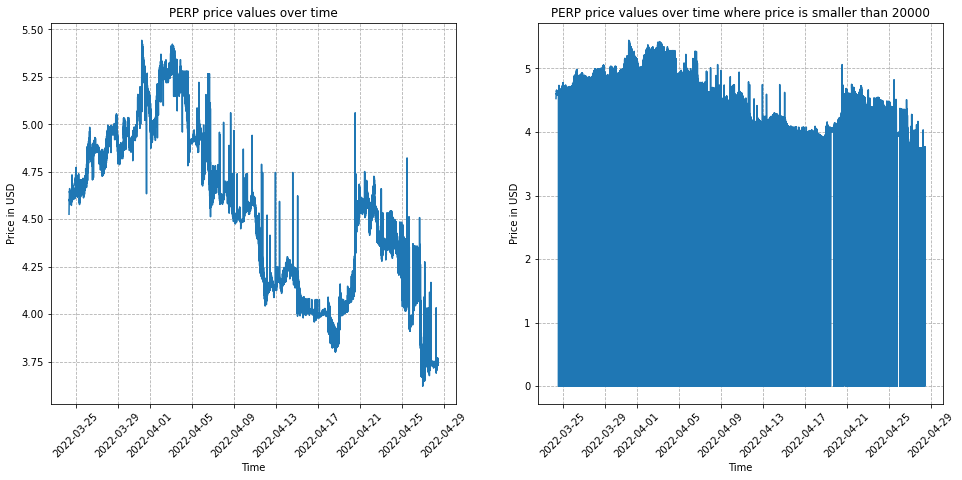

In [36]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 2, 1)
ax.plot(position_histories_df[(position_histories_df["pool_name"] == "vPERP") &
                              (position_histories_df["entry_price"] > 0)]["time"],
        position_histories_df[(position_histories_df["pool_name"] == "vPERP") &
                              (position_histories_df["entry_price"] > 0)]["entry_price"])
ax.set_xlabel("Time")
ax.set_ylabel("Price in USD")
ax.set_title("PERP price values over time")
ax.grid(linestyle='--')
plt.xticks(rotation=45)

ax = fig.add_subplot(1, 2, 2)
ax.plot(position_histories_df[(position_histories_df["pool_name"] == "vPERP") &
                              (position_histories_df["entry_price"] < 20000)]["time"],
        position_histories_df[(position_histories_df["pool_name"] == "vPERP") &
                              (position_histories_df["entry_price"] < 20000)]["entry_price"])
ax.set_xlabel("Time")
ax.set_ylabel("Price in USD")
ax.set_title("PERP price values over time where price is smaller than 20000")
ax.grid(linestyle='--')
plt.xticks(rotation=45)
plt.show()

## MATIC data analysis

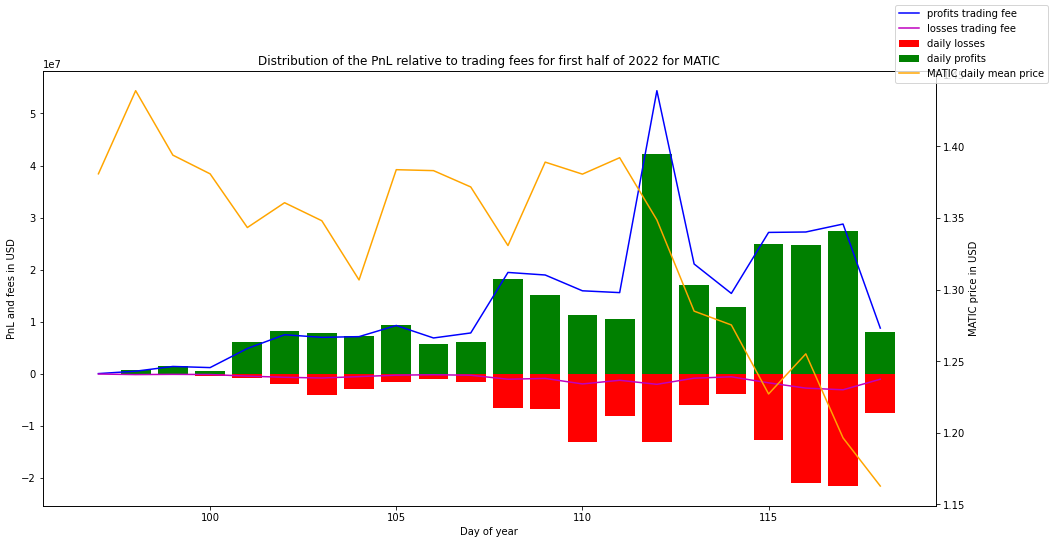

In [37]:
matic_position_histories_df = position_histories_df[position_histories_df["pool_name"] == "vMATIC"]

matic_position_losses_df = matic_position_histories_df[matic_position_histories_df["realized_pnl"] < 0]
matic_position_profits_df = matic_position_histories_df[matic_position_histories_df["realized_pnl"] >= 0]
daily_matic_position_losses_df = matic_position_losses_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()
daily_matic_position_profits_df = matic_position_profits_df[["day_of_year", "realized_pnl", "trading_fee", "liquidation_fee"]
                                              ].groupby("day_of_year").sum()

daily_matic_price_df = matic_position_histories_df[["day_of_year", "entry_price"]].groupby("day_of_year").mean()

fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax.bar(daily_matic_position_losses_df[daily_matic_position_losses_df.index < 200].index, 
       daily_matic_position_losses_df[daily_matic_position_losses_df.index < 200]["realized_pnl"], 
       color='r', label='daily losses')
ax.bar(daily_matic_position_profits_df[daily_matic_position_profits_df.index < 200].index, 
       daily_matic_position_profits_df[daily_matic_position_profits_df.index < 200]["realized_pnl"], 
       color='g', label='daily profits')
ax.plot(daily_matic_position_profits_df[daily_matic_position_profits_df.index < 200].index, 
        daily_matic_position_profits_df[daily_matic_position_profits_df.index < 200]["trading_fee"], 
        color='b', label='profits trading fee')
ax.plot(daily_matic_position_losses_df[daily_matic_position_losses_df.index < 200].index, 
        -daily_matic_position_losses_df[daily_matic_position_losses_df.index < 200]["trading_fee"], 
        color='m', label='losses trading fee')
ax2.plot(daily_matic_price_df[daily_matic_price_df.index < 200].index,
         daily_matic_price_df[daily_matic_price_df.index < 200]["entry_price"],
         color='orange', label='MATIC daily mean price')

fig.legend()
ax.set_xlabel("Day of year")
ax.set_ylabel("PnL and fees in USD")
ax2.set_ylabel("MATIC price in USD")
ax.set_title("Distribution of the PnL relative to trading fees for first half of 2022 for MATIC")
plt.show()

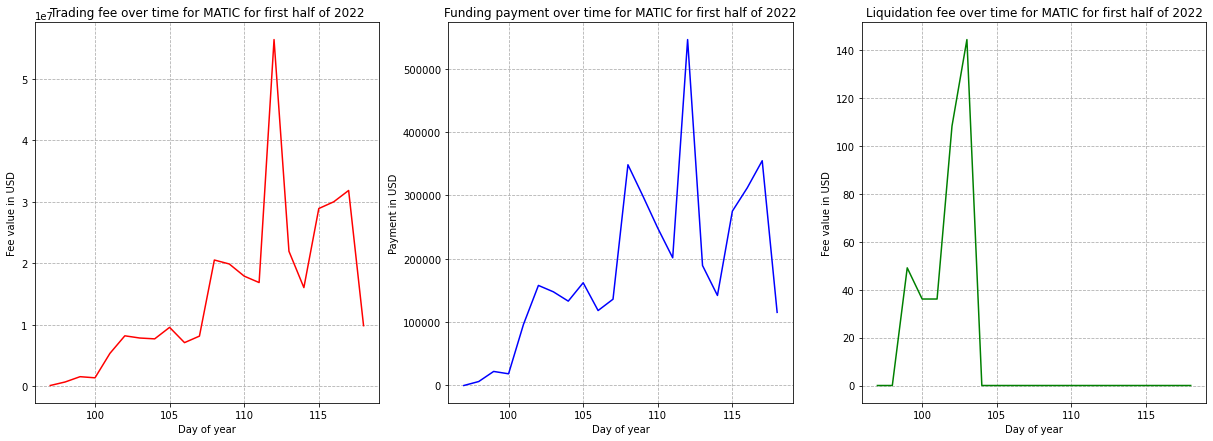

In [38]:
daily_matic_positions_df = position_histories_df[position_histories_df["pool_name"] == "vMATIC"][[
    "day_of_year", "trading_fee", "liquidation_fee", "funding_payment"]].groupby(by='day_of_year').sum()

fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(1, 3, 1)
ax.plot(daily_matic_positions_df[daily_matic_positions_df.index < 200].index, 
        daily_matic_positions_df[daily_matic_positions_df.index < 200]["trading_fee"], color='r')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Trading fee over time for MATIC for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 2)
ax.plot(daily_matic_positions_df[daily_matic_positions_df.index < 200].index, 
        daily_matic_positions_df[daily_matic_positions_df.index < 200]["funding_payment"], color='b', label='funding payment')
ax.set_xlabel("Day of year")
ax.set_ylabel("Payment in USD")
ax.set_title("Funding payment over time for MATIC for first half of 2022")
ax.grid(linestyle='--')

ax = fig.add_subplot(1, 3, 3)
ax.plot(daily_matic_positions_df[daily_matic_positions_df.index < 200].index, 
        daily_matic_positions_df[daily_matic_positions_df.index < 200]["liquidation_fee"], color='g', label='liquidation fee')
ax.set_xlabel("Day of year")
ax.set_ylabel("Fee value in USD")
ax.set_title("Liquidation fee over time for MATIC for first half of 2022")
ax.grid(linestyle='--')
plt.show()

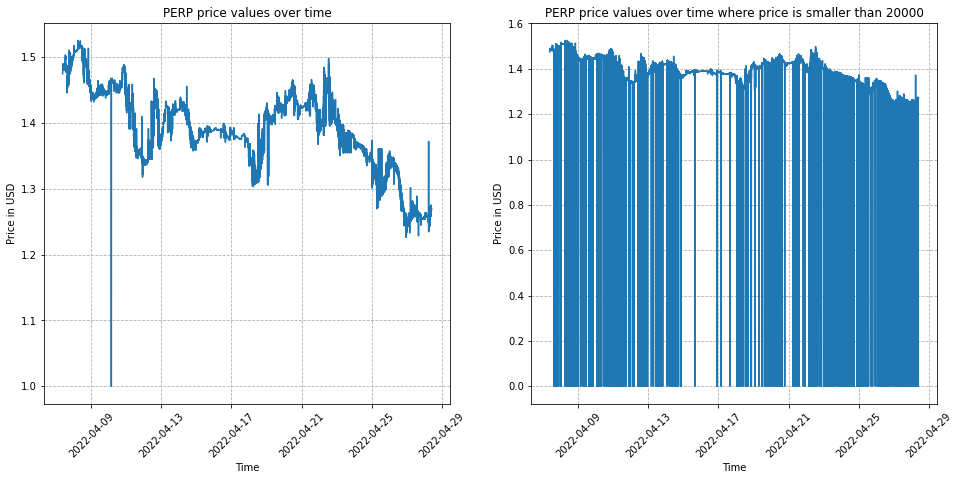

In [39]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 2, 1)
ax.plot(position_histories_df[(position_histories_df["pool_name"] == "vMATIC") &
                              (position_histories_df["entry_price"] > 0)]["time"],
        position_histories_df[(position_histories_df["pool_name"] == "vMATIC") &
                              (position_histories_df["entry_price"] > 0)]["entry_price"])
ax.set_xlabel("Time")
ax.set_ylabel("Price in USD")
ax.set_title("PERP price values over time")
ax.grid(linestyle='--')
plt.xticks(rotation=45)

ax = fig.add_subplot(1, 2, 2)
ax.plot(position_histories_df[(position_histories_df["pool_name"] == "vMATIC") &
                              (position_histories_df["entry_price"] < 20000)]["time"],
        position_histories_df[(position_histories_df["pool_name"] == "vMATIC") &
                              (position_histories_df["entry_price"] < 20000)]["entry_price"])
ax.set_xlabel("Time")
ax.set_ylabel("Price in USD")
ax.set_title("PERP price values over time where price is smaller than 20000")
ax.grid(linestyle='--')
plt.xticks(rotation=45)
plt.show()

# Check of the fees

In [40]:
position_histories_df["fee_rate"] = (position_histories_df["trading_fee"] * 100 /
                                     (position_histories_df["position_size"] * position_histories_df["entry_price"]))

In [44]:
position_histories_df[position_histories_df["fee_rate"] < 100000]["fee_rate"].max()

99646.51339884537